<a href="https://colab.research.google.com/github/mulashashi1996-ui/TASK7EL/blob/main/Task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving marketing_AB.csv to marketing_AB.csv


In [4]:
import pandas as pd
import io
data= pd.read_csv(io.BytesIO(uploaded['marketing_AB.csv']))
print(data.head())

   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


In [5]:
data.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
print(data.columns)


Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')


In [9]:
print(data['test group'].unique())


['ad' 'psa']


In [11]:
control = data[data['test group'] == 'control']
test = data[data['test group'] == 'test']

control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)



Control Conversion Rate: nan
Test Conversion Rate: nan


In [13]:
conversion_table = pd.crosstab(data['test group'], data['converted'])
print(conversion_table)


converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [14]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(conversion_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 54.005823883685245
p-value: 1.9989623063390075e-13


In [15]:
alpha = 0.05
if p < alpha:
    print("Reject H0: Significant difference between control and test groups.")
else:
    print("Fail to reject H0: No significant difference detected.")

Reject H0: Significant difference between control and test groups.


In [25]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep



control = data[data['test group'] == 'control']
test = data[data['test group'] == 'test']


control_group_data = data[data['test group'] == 'psa']
test_group_data = data[data['test group'] == 'ad']

x_control = control_group_data['converted'].sum()   # conversions in control
n_control = control_group_data['converted'].count() # total in control

x_test = test_group_data['converted'].sum()         # conversions in test
n_test = test_group_data['converted'].count()       # total in test

# Run two-proportion z-test
count = [x_control, x_test]
nobs = [n_control, n_test]

stat, pval = proportions_ztest(count, nobs, alternative='two-sided')

print("Z-statistic:", stat)
print("p-value:", pval)

# Interpret results
alpha = 0.05
if pval < alpha:
    print("Reject H0: Significant difference between control and test.")
else:
    print("Fail to reject H0: No significant difference detected.")

# Corrected call to confint_proportions_2indep using positional arguments
ci_low, ci_upp = confint_proportions_2indep(count1=x_test, nobs1=n_test,
                                            count2=x_control, nobs2=n_control,
                                            method='wald')

print("95% CI for difference in conversion rates:", (ci_low, ci_upp))


Z-statistic: -7.3700781265454145
p-value: 1.7052807161559727e-13
Reject H0: Significant difference between control and test.
95% CI for difference in conversion rates: (np.float64(0.005950932431611005), np.float64(0.00943397395279203))


test group
ad     564577
psa     23524
Name: count, dtype: int64


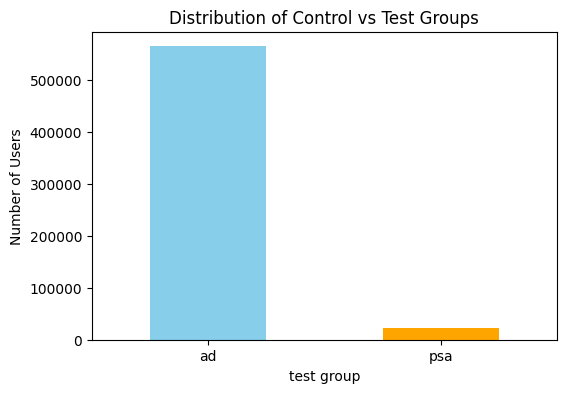

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("marketing_AB.csv")


group_counts = df['test group'].value_counts()
print(group_counts)
plt.figure(figsize=(6,4))
group_counts.plot(kind='bar', color=['skyblue','orange'])
plt.ylabel('Number of Users')
plt.title('Distribution of Control vs Test Groups')
plt.xticks(rotation=0)
plt.show()



The test group significantly outperformed the control group. The business should adopt the test strategy and Adversting group is providing the more numbers of users rather than psa